In [2]:
#!pip install TikTokApi
#!pip install nest_asyncio
#import nest_asyncio
#nest_asyncio.apply()
#from TikTokApi import TikTokApi
from numpy.random import seed
from numpy.random import randint
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import pandas as pd
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
from jupyterthemes import jtplot
jtplot.style(theme='grade3', context='notebook', ticks=True, grid=False)
from pprint import pprint
import re
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator
import nltk
import seaborn as sns
from collections import Counter
nltk.download('stopwords')
from io import StringIO
from matplotlib.ticker import PercentFormatter
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JOSE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
#n_videos = 5
#username = 'elpumajoseluisr'
#user_videos = TikTokApi.byUsername(username, count=n_videos)
influenciadores = [
    'Base_tiktok_final.xlsx',
    'Base_tiktok_bebyshg.xlsx',
    'Base_tiktok_crashmiguel2022.xlsx',
    'Base_tiktok_elpumajoseluis.xlsx',
    'Base_tiktok_joserojasprensa.xlsx',
    'Base_tiktok_moisessaa.xlsx',
    'Base_tiktok_oscararriechirive.xlsx'
]
base_tiktok = pd.DataFrame()
for base in influenciadores:
    base_tiktok = base_tiktok.append(pd.read_excel(base),ignore_index = True)
base_tiktok

C:\Users\JOSE\AppData\Local\Temp/ipykernel_14876/3445248918.py:15: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  base_tiktok = base_tiktok.append(pd.read_excel(base),ignore_index = True)


,Unnamed: 0,level,display_name,username,comment,fecha,likes,replies,Thread_author
0,0,1,Richard Anze,https://www.tiktok.com/@richard.anze,cn 500$ te vas en avion🤣🤣🤣,2022-9-18,251,9,https://www.tiktok.com/@richard.anze
1,1,2,Julio,https://www.tiktok.com/@julio_florez21,Y te queda,2022-9-23,6,0,https://www.tiktok.com/@richard.anze
2,2,2,Gustavo Daga Prado,https://www.tiktok.com/@gustavodaga,jaja dirás con 1100 dólares,2022-10-13,3,0,https://www.tiktok.com/@richard.anze
3,3,2,Bybro,https://www.tiktok.com/@userf5aqznaxc0,pero no tienen pasaporte ni visa,2022-10-13,11,0,https://www.tiktok.com/@richard.anze
4,4,2,jfjf,https://www.tiktok.com/@andy12_37,es difícil conseguir eso?,2022-10-14,0,0,https://www.tiktok.com/@richard.anze
...,...,...,...,...,...,...,...,...,...
5399,32,1,Cesar Camacho1507,https://www.tiktok.com/@cesarcamacho013,Que tal el guía cómo se contacta,2022-8-9,0,3,https://www.tiktok.com/@cesarcamacho013
5400,33,1,elenanintodelbosq,https://www.tiktok.com/@elenanintodelbosq,contacto del guía,2022-8-1,1,3,https://www.tiktok.com/@elenanintodelbosq
5401,34,1,Made🌹,https://www.tiktok.com/@madelineeeee03,Hola como me contacto con ese guía,2022-6-30,0,3,https://www.tiktok.com/@madelineeeee03
5402,35,1,Wilson Chacin,https://www.tiktok.com/@wilson_10sep,😎😎😎😎😎😎,2022-9-22,0,3,https://www.tiktok.com/@wilson_10sep


In [43]:
base_tiktok.fillna('', inplace=True)

In [44]:
#Eliminamos los URL: Todo lo que empieza por  HTTP
base_tiktok['Clean_Text']=base_tiktok['comment'].replace(r"http\S+", '', regex=True)
#Eliminamos todos los hashtags
base_tiktok['Clean_Text']=base_tiktok['Clean_Text'].replace('#\\w+', '', regex=True)
#Eliminamos los signos de puntuación repetidos dentro de los tweets
base_tiktok['Clean_Text']=base_tiktok['Clean_Text'].replace(r'([^0-9a-zA-Z])\1+', r'\1', regex=True)
#Eliminamos los signos de puntuación al inicio de un tweet
base_tiktok['Clean_Text']=base_tiktok['Clean_Text'].replace(r'^[^0-9a-zA-Z@#]+', '', regex=True)
#Eliminamos los dobles espacios
base_tiktok['Clean_Text']=base_tiktok['Clean_Text'].replace(r'()\1+', r'\1\1', regex=True)
#Eliminamos las letras repetivas dentro de las palabras
base_tiktok['Clean_Text']=base_tiktok['Clean_Text'].replace(r'(.)\1+', r'\1\1', regex=True)
# Quitar las comillas de los textos
base_tiktok['Clean_Text']=base_tiktok['Clean_Text'].replace('"', '', regex=True)
# Remover puntuaciones innecesarias
base_tiktok['Clean_Text'] = base_tiktok['Clean_Text'].map(lambda x: re.sub('[,\.!?]', '', x))
base_tiktok['Clean_Text']= base_tiktok['Clean_Text'].str.replace('RT', '')
# Remover mayúsculas de inicio de texto
base_tiktok['Clean_Text'] = base_tiktok['Clean_Text'].map(lambda x: x.lower())
#Autores
base_tiktok['Clean_Text']=base_tiktok['Clean_Text'].replace(r'@\w+', '', regex=True)
base_tiktok['Clean_Text']=base_tiktok['Clean_Text'].str.replace('rt', '')
#Espacios
base_tiktok['Clean_Text']=base_tiktok['Clean_Text'].str.strip()
base_tiktok['Clean_Text']=base_tiktok['Clean_Text'].replace('Document_No', '')
base_tiktok['Clean_Text']=base_tiktok['Clean_Text'].replace('pasapoe', 'pasaporte')
# Exclude stopwords 
spanish_stopwords=stopwords.words('spanish')
spanish_stopwords.extend(['ser', 'haber','ver','no','ni','ago','buenas','cómo','tal','hola','cn'])
#spanish_stopwords.extend(usuarios)
#spanish_stopwords.remove('no')
#spanish_stopwords.remove('ni')
base_tiktok['Clean_Text_no_stopwords'] = base_tiktok['Clean_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (spanish_stopwords) and len(word)>1]))
base_tiktok.fillna('',inplace=True)
base_tiktok.head(10)

,Unnamed: 0,level,display_name,username,comment,fecha,likes,replies,Thread_author,Clean_Text,Clean_Text_no_stopwords
0,0,1,Richard Anze,https://www.tiktok.com/@richard.anze,cn 500$ te vas en avion🤣🤣🤣,2022-9-18,251,9,https://www.tiktok.com/@richard.anze,cn 500$ te vas en avion🤣,500$ vas avion🤣
1,1,2,Julio,https://www.tiktok.com/@julio_florez21,Y te queda,2022-9-23,6,0,https://www.tiktok.com/@richard.anze,y te queda,queda
2,2,2,Gustavo Daga Prado,https://www.tiktok.com/@gustavodaga,jaja dirás con 1100 dólares,2022-10-13,3,0,https://www.tiktok.com/@richard.anze,jaja dirás con 1100 dólares,jaja dirás 1100 dólares
3,3,2,Bybro,https://www.tiktok.com/@userf5aqznaxc0,pero no tienen pasaporte ni visa,2022-10-13,11,0,https://www.tiktok.com/@richard.anze,pero no tienen pasapoe ni visa,pasapoe visa
4,4,2,jfjf,https://www.tiktok.com/@andy12_37,es difícil conseguir eso?,2022-10-14,0,0,https://www.tiktok.com/@richard.anze,es difícil conseguir eso,difícil conseguir
5,5,2,Nicky,https://www.tiktok.com/@nixrole,Si pero pueden ir en avión hasta México y evit...,2022-10-14,2,0,https://www.tiktok.com/@richard.anze,si pero pueden ir en avión hasta méxico y evit...,si pueden ir avión méxico evitarse tema selva
6,6,2,Francy Ramirez9603,https://www.tiktok.com/@apoloxiii,piden visa.. que sale super costosa y el pasap...,2022-10-15,1,0,https://www.tiktok.com/@richard.anze,piden visa que sale super costosa y el pasapoe...,piden visa sale super costosa pasapoe ojo cara
7,7,2,jhoanjimenez560,https://www.tiktok.com/@jhoanjimenez560,y si no te dan el permiso y no tienes visa,2022-10-8,7,0,https://www.tiktok.com/@richard.anze,y si no te dan el permiso y no tienes visa,si dan permiso visa
8,8,2,Bybro,https://www.tiktok.com/@userf5aqznaxc0,La visa a eeuu es complicada para cualquiera d...,2022-10-14,0,0,https://www.tiktok.com/@richard.anze,la visa a eeuu es complicada para cualquiera d...,visa eeuu complicada cualquiera latinoam perso...
9,9,2,Estefanía,https://www.tiktok.com/@estefania2719,Por lo que tengo entendido no se les permitía ...,2022-10-19,0,0,https://www.tiktok.com/@richard.anze,por lo que tengo entendido no se les permitía ...,entendido permitía venezolanos ir avión méxico


In [46]:
series_a_str = str(base_tiktok["Clean_Text_no_stopwords"])
series_a_str = series_a_str.replace('Document_No', '')
series_a_str = series_a_str.replace('dtype', '')
series_a_str = series_a_str.replace('object', '')
series_a_str = series_a_str.replace('Name', '')
series_a_str = series_a_str.replace('Length', '')
series_a_str = series_a_str.replace('Clean_Text_no_stopwords', '')
series_a_str = series_a_str.replace('pasapoe', 'pasaporte')

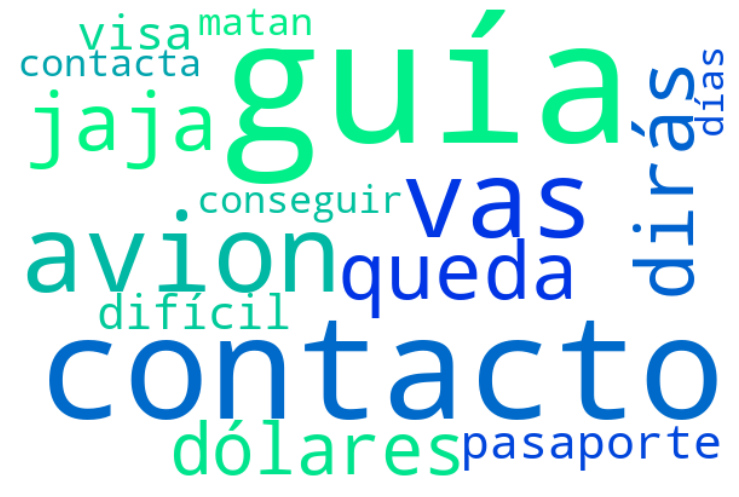

In [56]:
cloud=WordCloud(background_color='white',colormap="winter_r",width=600,height=400).generate(series_a_str)
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

In [57]:
series_a_str = str(base_tiktok[base_tiktok["level"] == 1]['Clean_Text_no_stopwords'])
series_a_str = series_a_str.replace('Document_No', '')
series_a_str = series_a_str.replace('dtype', '')
series_a_str = series_a_str.replace('object', '')
series_a_str = series_a_str.replace('Name', '')
series_a_str = series_a_str.replace('Length', '')
series_a_str = series_a_str.replace('Clean_Text_no_stopwords', '')
series_a_str = series_a_str.replace('pasapoe', 'pasaporte')

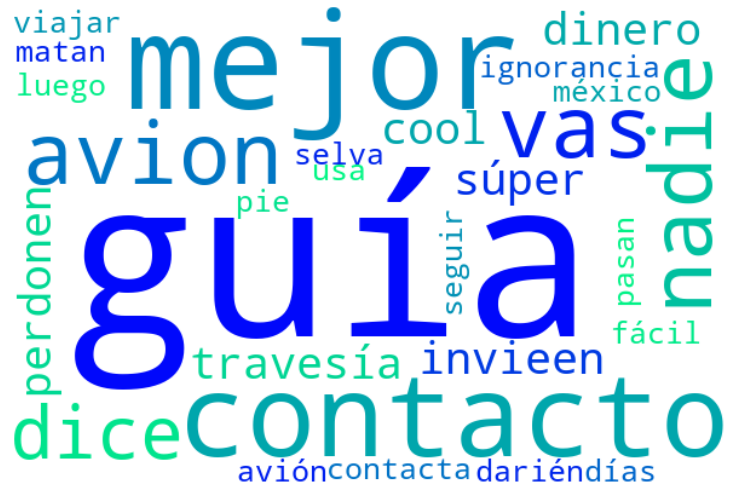

In [58]:
cloud=WordCloud(background_color='white',colormap="winter_r",width=600,height=400).generate(series_a_str)
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

In [62]:
base_tiktok['fecha'] = base_tiktok['fecha'].apply(lambda a: pd.to_datetime(a).date()) 
base_tiktok['dia'] = base_tiktok['fecha'].apply(lambda a: pd.to_datetime(a).day)
base_tiktok['mes'] = base_tiktok['fecha'].apply(lambda a: pd.to_datetime(a).month)
base_tiktok['año'] = base_tiktok['fecha'].apply(lambda a: pd.to_datetime(a).year)
base_tiktok['mes_label'] = base_tiktok['mes'].apply(lambda a: pd.to_datetime(a).month)
for index, row in base_tiktok.iterrows():
    if base_tiktok.loc[index,'mes'] == 1:
        base_tiktok.loc[index,'mes_label'] = 'enero'
    elif base_tiktok.loc[index,'mes'] == 2:
        base_tiktok.loc[index,'mes_label'] = 'febrero'
    elif base_tiktok.loc[index,'mes'] == 3:
        base_tiktok.loc[index,'mes_label'] = 'marzo'
    elif base_tiktok.loc[index,'mes'] == 4:
        base_tiktok.loc[index,'mes_label'] = 'abril'
    elif base_tiktok.loc[index,'mes'] == 5:
        base_tiktok.loc[index,'mes_label'] = 'mayo'
    elif base_tiktok.loc[index,'mes'] == 6:
        base_tiktok.loc[index,'mes_label'] = 'junio'
    elif base_tiktok.loc[index,'mes'] == 7:
        base_tiktok.loc[index,'mes_label'] = 'julio'
    elif base_tiktok.loc[index,'mes'] == 8:
        base_tiktok.loc[index,'mes_label'] = 'agosto'
    elif base_tiktok.loc[index,'mes'] == 9:
        base_tiktok.loc[index,'mes_label'] = 'septiembre'
    elif base_tiktok.loc[index,'mes'] == 10:
        base_tiktok.loc[index,'mes_label'] = 'octubre'
    elif base_tiktok.loc[index,'mes'] == 11:
        base_tiktok.loc[index,'mes_label'] = 'noviembre'
    else:
        base_tiktok.loc[index,'mes_label'] = 'diciembre'
base_agrupada_fechas = base_tiktok.groupby('mes').sum()
base_agrupada_fechas.loc[1,'mes_label'] = 'enero'
base_agrupada_fechas.loc[6,'mes_label'] = 'junio'
base_agrupada_fechas.loc[7,'mes_label'] = 'julio'
base_agrupada_fechas.loc[8,'mes_label'] = 'agosto'
base_agrupada_fechas.loc[9,'mes_label'] = 'septiembre'
base_agrupada_fechas.loc[10,'mes_label'] = 'octubre'
base_agrupada_fechas.loc[11,'mes_label'] = 'noviembre'
base_agrupada_fechas.loc[12,'mes_label'] = 'diciembre'
base_agrupada_fechas.drop(1, inplace=True)
base_agrupada_fechas.head(10)

,Unnamed: 0,level,likes,replies,dia,año,mes_label
mes,,,,,,,
6,112,4,3,10,101,8088,junio
7,2026589,1439,18503,1061,27242,2505258,julio
8,1094676,959,7094,693,15279,1678260,agosto
9,1751969,2686,5667,1583,47365,4711260,septiembre
10,473025,1052,144,843,8122,1931010,octubre
11,4604,25,1,2,431,50550,noviembre
12,3974,19,0,0,265,32352,diciembre


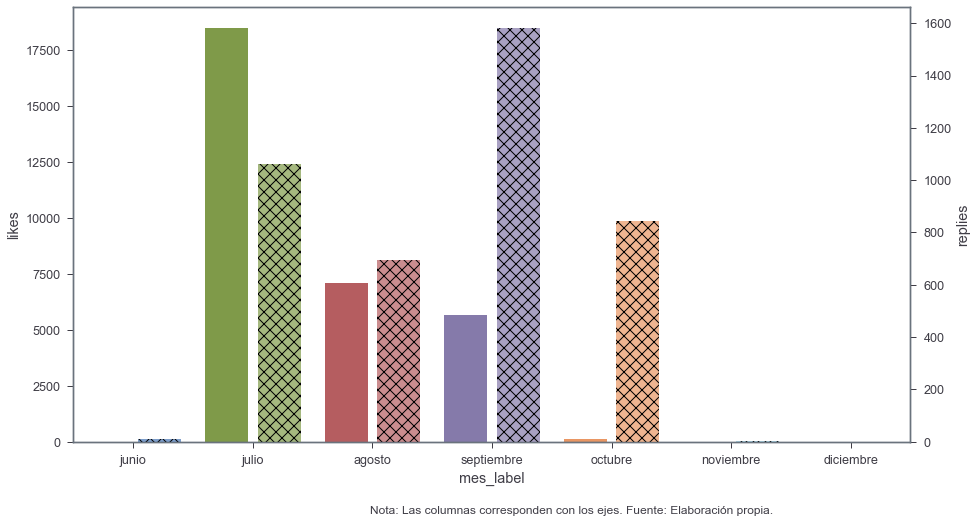

In [63]:
x_ = base_agrupada_fechas.columns[6]
y_ = base_agrupada_fechas.columns[2]
y_2 = base_agrupada_fechas.columns[3]
data1 = base_agrupada_fechas[[x_, y_]]
data2 = base_agrupada_fechas[[x_, y_2]]
plt.figure(figsize=(15,8))
ax = sns.barplot(x=x_,y=y_,data=data1)
width_scale = 0.45
for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width_scale)
#ax.yaxis.set_major_formatter(PercentFormatter(1))
ax.figure.text(0.4, 0,'Nota: Las columnas corresponden con los ejes. Fuente: Elaboración propia.', fontsize=12)
ax.grid(False)
ax2 = ax.twinx()
sns.barplot(x=x_,y=y_2,data=data2,alpha=0.7,hatch='xx',ax=ax2)
for bar in ax2.containers[0]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + w * (1 - width_scale))
    bar.set_width(w *  width_scale)
#ax2.yaxis.set_major_formatter(PercentFormatter(1))
ax2.grid(False)
plt.savefig("out.png") 
plt.show()

In [64]:
# Nubes de palabras de septiembre
series_a_str = str(base_tiktok[base_tiktok["mes_label"] == 'septiembre']['Clean_Text_no_stopwords'])
series_a_str = series_a_str.replace('Document_No', '')
series_a_str = series_a_str.replace('dtype', '')
series_a_str = series_a_str.replace('object', '')
series_a_str = series_a_str.replace('Name', '')
series_a_str = series_a_str.replace('Length', '')
series_a_str = series_a_str.replace('Clean_Text_no_stopwords', '')

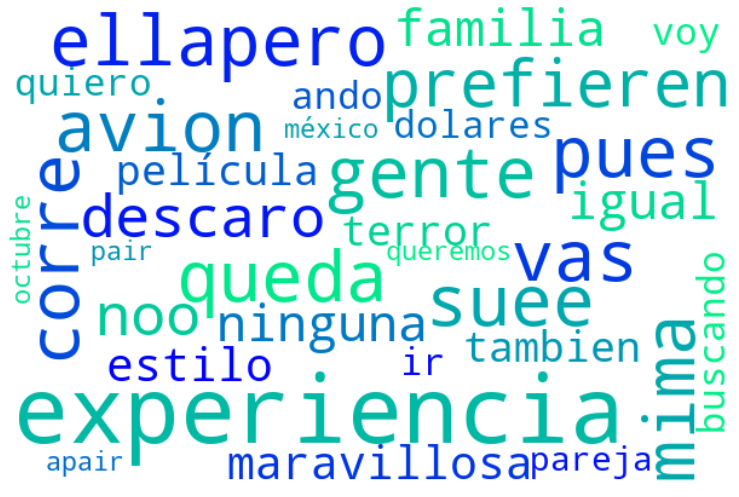

In [65]:
cloud=WordCloud(background_color='white',colormap="winter_r",width=600,height=400).generate(series_a_str)
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

In [68]:
base_tiktok['Interacciones'] = 1
base_agrupada_fechas = base_tiktok.groupby('fecha').sum()

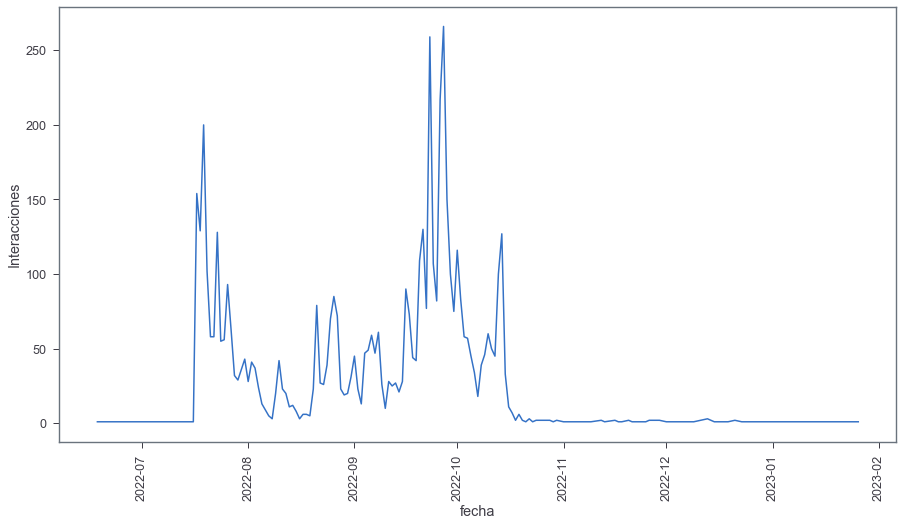

In [69]:
plt.figure(figsize=(15,8))
#base_tiktok.rename(inplace=True,  columns={"Menciones" : "Publicaciones"})
ax = sns.lineplot(x=base_agrupada_fechas.index,y=base_agrupada_fechas["Interacciones"],data=base_agrupada_fechas)
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [51]:
base_agrupada_fechas.head(10)

,Unnamed: 0,level,likes,replies,dia,mes,año,Publicaciones
fecha,,,,,,,,
2022-07-17,21390,36,3127,232,493,203,58638,29
2022-07-18,14547,30,120,41,378,147,42462,21
2022-07-19,130714,177,704,231,2489,917,264882,131
2022-07-20,18810,52,280,49,660,231,66726,33
2022-07-21,14196,24,33,10,357,119,34374,17
2022-07-22,30147,46,64,21,726,231,66726,33
2022-07-23,26687,21,3,36,460,140,40440,20
2022-07-24,5100,11,0,3,168,49,14154,7
2022-07-25,8463,8,0,6,175,49,14154,7


In [8]:
# desinformación y preguntas
import inflector as ior
print(ior.Spanish.pluralize(ior,word='mentira'))

'mentiras'

In [54]:
#bs4.builder.register_treebuilders_from(bs4.builder._lxml)
#bs4.builder.builder_registry.builders
import urllib
import lxml
from bs4 import BeautifulSoup as soup
import re
data = str(urllib.request.urlopen('https://educalingo.com/en/dic-es/{}'.format('contador')).read().decode('utf-8'))
final_results = re.findall('\w+', [i.text for i in soup(data, 'lxml').find_all('div', {"class":'contenido_sinonimos_antonimos0'})][0])
print(final_results)

['cajero', 'contable', 'cuentarrevoluciones', 'electrómetro', 'interventor', 'medidor', 'taxímetro', 'tesorero', 'voltímetro']


In [ ]:
palabras_desinformadora = ['falso','mentira','desinformación','desinforma','desmiente']
palabras_preguntas = ['pregunta','solicito','saber','necesito','cuanto']
# Pluralizar
lista_final_desinformadora = list()
for palabra in palabras_desinformadora:
    plural = ior.Spanish.pluralize(ior,word=palabra)
    data = str(urllib.request.urlopen('https://educalingo.com/en/dic-es/{}'.format(palabra)).read().decode('utf-8'))
    sleep(2)
    data_1 = str(urllib.request.urlopen('https://educalingo.com/en/dic-es/{}'.format(plural)).read().decode('utf-8'))
    final_results = re.findall('\w+', [i.text for i in soup(data, 'lxml').find_all('div', {"class":'contenido_sinonimos_antonimos0'})][0])
    final_results_1 = re.findall('\w+', [i.text for i in soup(data_1, 'lxml').find_all('div', {"class":'contenido_sinonimos_antonimos0'})][0])
    final_results.extend(final_results_1)
    

In [3]:
# Análisis del FEED
archivo = pd.read_excel('Base_feed_con_métricas.xlsx')
archivo.head(2)

C:\Users\JOSE\anaconda3\envs\nltkenv\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Orden_Recomendación,Categoría,Palabras Clave,descripcion,usuario,fecha,mes,año,link,views,num_comments,num_likes,num_views,num_shares,followers,following,num_videos,heart_count
0,0.0,Disuasivo,preservativos-abusos-preservativos usados,#darien #selvadeldarien #noticias #migrantes ...,noticiasmg,2023-01-30,1.0,2023.0,https://www.tiktok.com/@noticiasmg/video/71946...,2.3M,392.0,39200.0,2600000.0,453.0,129600.0,0.0,147.0,633900.0
1,1.0,Vídeo cómico,dramatizado - jóvenes llevan arrastrado en una...,viejo en el darien #tiktok #viral #valledupar ...,yaisonvanegas,2022-10-17,10.0,2022.0,https://www.tiktok.com/@yaisonvanegas/video/71...,2.2M,891.0,99700.0,2200000.0,792.0,63100.0,101.0,337.0,533300.0


In [4]:
#Eliminamos los URL: Todo lo que empieza por  HTTP
archivo['Clean_Text']=archivo['descripcion'].replace(r"http\S+", '', regex=True)
#Eliminamos todos los hashtags
#archivo['Clean_Text']=archivo['Clean_Text'].replace('#\\w+', '', regex=True)
#Eliminamos los signos de puntuación repetidos dentro de los tweets
archivo['Clean_Text']=archivo['Clean_Text'].replace(r'([^0-9a-zA-Z])\1+', r'\1', regex=True)
#Eliminamos los signos de puntuación al inicio de un tweet
archivo['Clean_Text']=archivo['Clean_Text'].replace(r'^[^0-9a-zA-Z@#]+', '', regex=True)
#Eliminamos los dobles espacios
archivo['Clean_Text']=archivo['Clean_Text'].replace(r'()\1+', r'\1\1', regex=True)
#Eliminamos las letras repetivas dentro de las palabras
archivo['Clean_Text']=archivo['Clean_Text'].replace(r'(.)\1+', r'\1\1', regex=True)
# Quitar las comillas de los textos
archivo['Clean_Text']=archivo['Clean_Text'].replace('"', '', regex=True)
# Remover puntuaciones innecesarias
archivo['Clean_Text'] = archivo['Clean_Text'].map(lambda x: re.sub('[,\.!?]', '', x))
archivo['Clean_Text']= archivo['Clean_Text'].str.replace('RT', '')
# Remover mayúsculas de inicio de texto
archivo['Clean_Text'] = archivo['Clean_Text'].map(lambda x: x.lower())
#Autores
#archivo['Clean_Text']=archivo['Clean_Text'].replace(r'@\w+', '', regex=True)
archivo['Clean_Text']=archivo['Clean_Text'].str.replace('rt', '')
#Espacios
archivo['Clean_Text']=archivo['Clean_Text'].str.strip()
archivo['Clean_Text']=archivo['Clean_Text'].replace('Document_No', '')
archivo['Clean_Text']=archivo['Clean_Text'].replace('pasapoe', 'pasaporte')
# Exclude stopwords 
spanish_stopwords=stopwords.words('spanish')
spanish_stopwords.extend(['ser', 'haber','ver','no','ni','ago','buenas','cómo','tal','hola','cn'])
#spanish_stopwords.extend(usuarios)
#spanish_stopwords.remove('no')
#spanish_stopwords.remove('ni')
archivo['Clean_Text_no_stopwords'] = archivo['Clean_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (spanish_stopwords) and len(word)>1]))
archivo.fillna('',inplace=True)
archivo.head(2)

,Orden_Recomendación,Categoría,Palabras Clave,descripcion,usuario,fecha,mes,año,link,views,num_comments,num_likes,num_views,num_shares,followers,following,num_videos,heart_count,Clean_Text,Clean_Text_no_stopwords
0,0.0,Disuasivo,preservativos-abusos-preservativos usados,#darien #selvadeldarien #noticias #migrantes ...,noticiasmg,2023-01-30,1.0,2023.0,https://www.tiktok.com/@noticiasmg/video/71946...,2.3M,392.0,39200.0,2600000.0,453.0,129600.0,0.0,147.0,633900.0,#darien #selvadeldarien #noticias #migrantes #...,#darien #selvadeldarien #noticias #migrantes #...
1,1.0,Vídeo cómico,dramatizado - jóvenes llevan arrastrado en una...,viejo en el darien #tiktok #viral #valledupar ...,yaisonvanegas,2022-10-17,10.0,2022.0,https://www.tiktok.com/@yaisonvanegas/video/71...,2.2M,891.0,99700.0,2200000.0,792.0,63100.0,101.0,337.0,533300.0,viejo en el darien #tiktok #viral #valledupar ...,viejo darien #tiktok #viral #valledupar #siegu...


             Orden_Recomendación   mes     año  num_comments  num_likes  \
mes_año                                                                   
1.0_2023.0                1531.0   1.0  2023.0        8210.0   645893.0   
10.0_2022.0              12017.0  10.0  2022.0       64174.0  3314527.0   
11.0_2022.0               3748.0  11.0  2022.0       49619.0  4177356.0   
12.0_2022.0               1406.0  12.0  2022.0        6309.0  2131204.0   
2.0_2023.0                1809.0   2.0  2023.0        8797.0   937761.0   

              num_views  num_shares  followers  following  num_videos  \
mes_año                                                                 
1.0_2023.0   17518100.0     13512.0   501202.0     4634.0      2259.0   
10.0_2022.0  86612600.0    248814.0  9874773.0    37224.0     19699.0   
11.0_2022.0  72009400.0    180930.0  1501894.0    16281.0      4886.0   
12.0_2022.0  15119200.0     13216.0   978569.0      725.0      1952.0   
2.0_2023.0   18623300.0     48910.0 

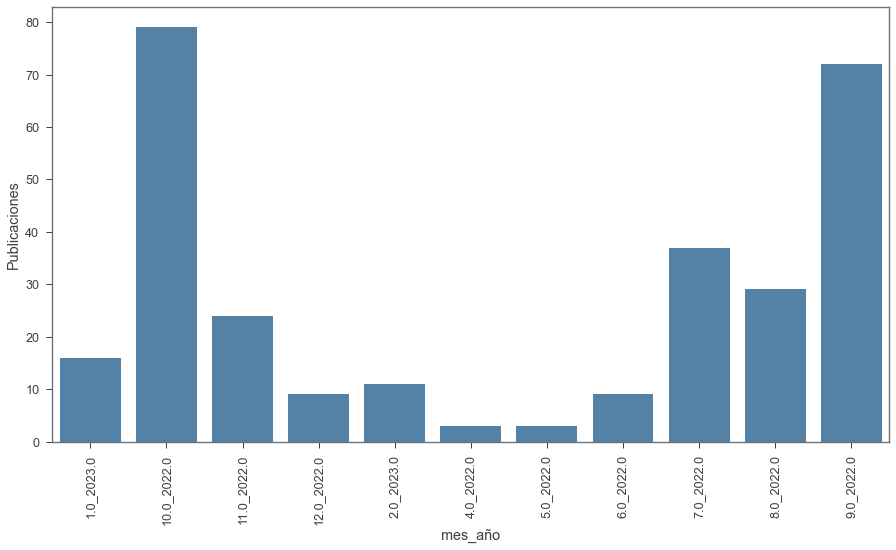

In [6]:
archivo['Publicaciones'] = 1
archivo['mes_año'] = archivo['mes'].astype(str) + '_' + archivo['año'].astype(str)
base_agrupada_fechas = archivo.groupby('mes_año').sum()
base_agrupada_fechas['mes'] = 0
base_agrupada_fechas['año'] = 0
for index, row in base_agrupada_fechas.iterrows():
    mes_año = str(index).split('_')
    base_agrupada_fechas.loc[index, 'mes'] = mes_año[0]
    base_agrupada_fechas.loc[index, 'año'] = mes_año[1]
base_agrupada_fechas['mes_año_order'] = base_agrupada_fechas['mes'].astype(str) + '_' + base_agrupada_fechas['año'].astype(str)
base_agrupada_fechas['mes_año_order'].replace({'4_2022':0,'5_2022':1,'6_2022':2,'7_2022':3,'8_2022':4,'9_2022':5,'10_2022':6,'11_2022':7,'12_2022':8,'1_2023':9,'2_2023':10}, inplace=True)
base_agrupada_fechas.sort_values(['mes_año_order'], ascending = True, inplace = True)
print(base_agrupada_fechas.head(5))
plt.figure(figsize=(15,8))
#base_tiktok.rename(inplace=True,  columns={"Menciones" : "Publicaciones"})
ax = sns.barplot(x=base_agrupada_fechas.index,y=base_agrupada_fechas["Publicaciones"],data=base_agrupada_fechas,color='steelblue')
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()

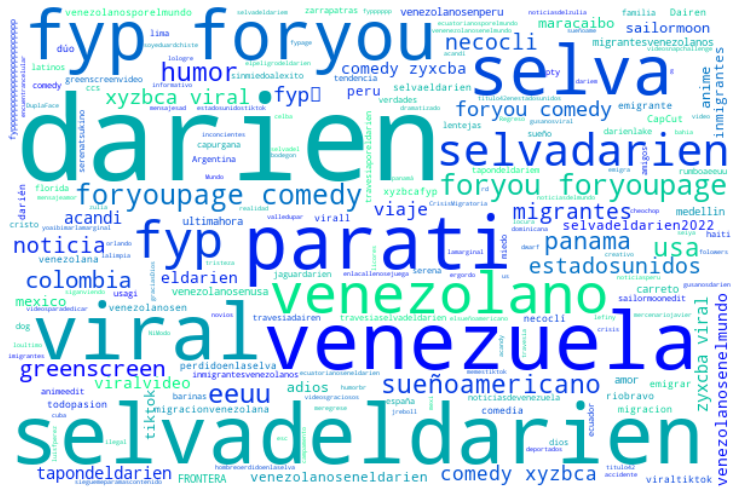

In [7]:
hashtags = archivo.descripcion.str.findall(r'#.*?(?=\s|$)')
cadena = ''
for lista in hashtags:
    for i in lista:
        cadena = cadena + ' ' + i
cloud=WordCloud(background_color='white',colormap="winter_r",width=600,height=400).generate(cadena)
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

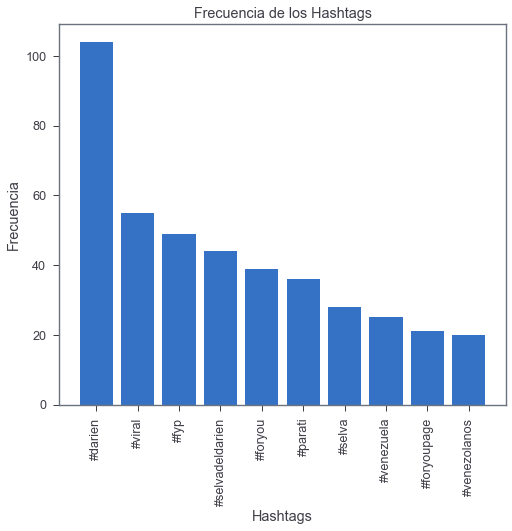

In [8]:
from collections import Counter
palabras_clave = list()
for lista in hashtags:
    for i in lista:
        palabras_clave.append(i)
count = Counter(palabras_clave)
data = count.most_common(10)
x_values = [x[0] for x in data]
y_values = [x[1] for x in data]

plt.bar(x_values, y_values)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability
plt.xlabel('Hashtags')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los Hashtags')
plt.show()

In [9]:
print(pd.unique(archivo['Categoría']))
archivo['Categoría'] = archivo['Categoría'].replace({
    'Vídeo cómico':'Video cómico',
    'Informativos zona':'Informativo zona',
    'Denuncia a Estados':'Denuncia Estados'
})
print(pd.unique(archivo['Categoría']))

['Disuasivo' 'Vídeo cómico' 'Dificultades de la travesía' 'No disponible'
 'Denuncia a Estados' 'Denuncia de afectaciones ambientales'
 'Informativo travesía' 'Motivacional' 'Informativos zona'
 'Desinformación' 'Video cómico' 'Informativo zona'
 'No corresponde al tema' 'Imágenes de la travesía' 'Sin categoría'
 'Denuncia Estados']
['Disuasivo' 'Video cómico' 'Dificultades de la travesía' 'No disponible'
 'Denuncia Estados' 'Denuncia de afectaciones ambientales'
 'Informativo travesía' 'Motivacional' 'Informativo zona' 'Desinformación'
 'No corresponde al tema' 'Imágenes de la travesía' 'Sin categoría']


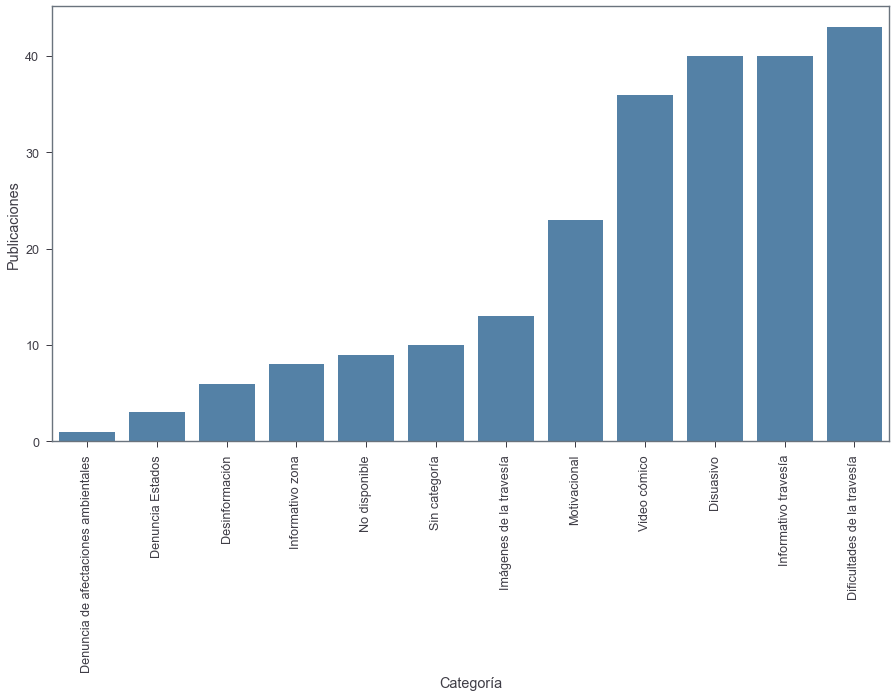

In [10]:
base_agrupada_fechas = archivo.groupby('Categoría').sum()
plt.figure(figsize=(15,8))
#base_tiktok.rename(inplace=True,  columns={"Menciones" : "Publicaciones"})
base_agrupada_fechas.sort_values(['Publicaciones'], ascending = True, inplace = True)
base_agrupada_fechas = base_agrupada_fechas[base_agrupada_fechas.index != 'No corresponde al tema']
ax = sns.barplot(x=base_agrupada_fechas.index,y=base_agrupada_fechas["Publicaciones"],data=base_agrupada_fechas,color='steelblue')
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()

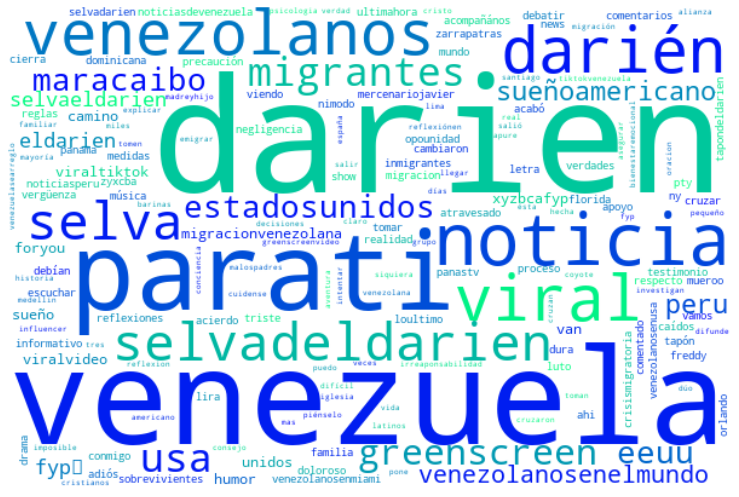

In [11]:
palabras = archivo[archivo['Categoría'] == 'Disuasivo']['Clean_Text_no_stopwords'].to_list()
cloud=WordCloud(background_color='white',colormap="winter_r",width=600,height=400).generate(' '.join(palabras))
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

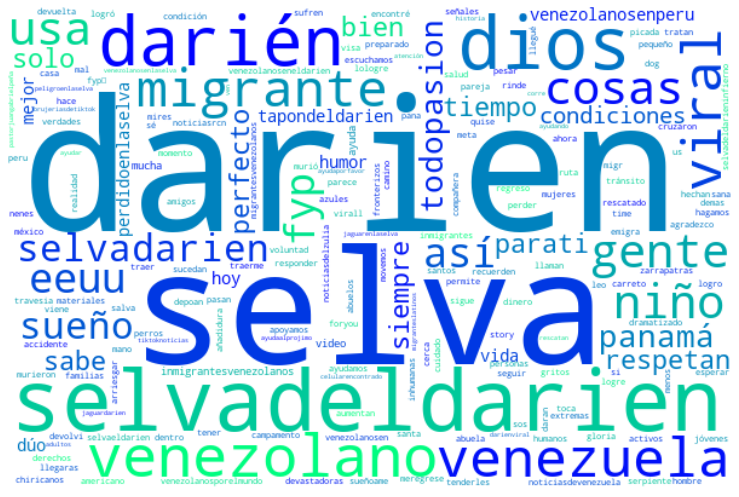

In [12]:
palabras = archivo[archivo['Categoría'] == 'Dificultades de la travesía']['Clean_Text_no_stopwords'].to_list()
cloud=WordCloud(background_color='white',colormap="winter_r",width=600,height=400).generate(' '.join(palabras))
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

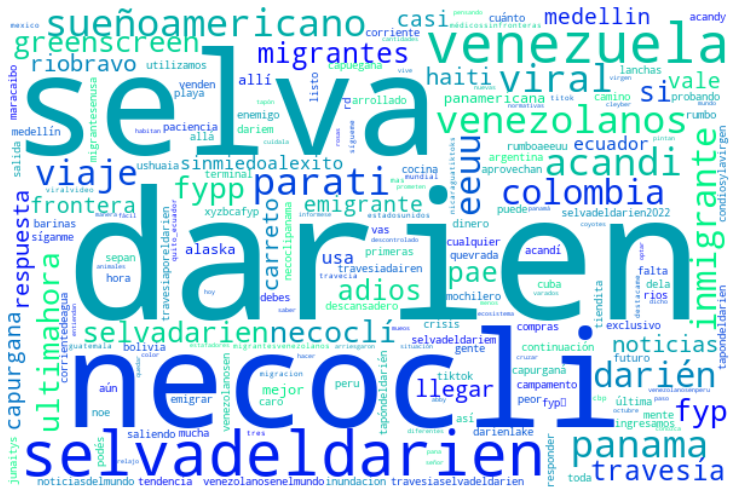

In [13]:
palabras = archivo[archivo['Categoría'] == 'Informativo travesía']['Clean_Text_no_stopwords'].to_list()
cloud=WordCloud(background_color='white',colormap="winter_r",width=600,height=400).generate(' '.join(palabras))
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

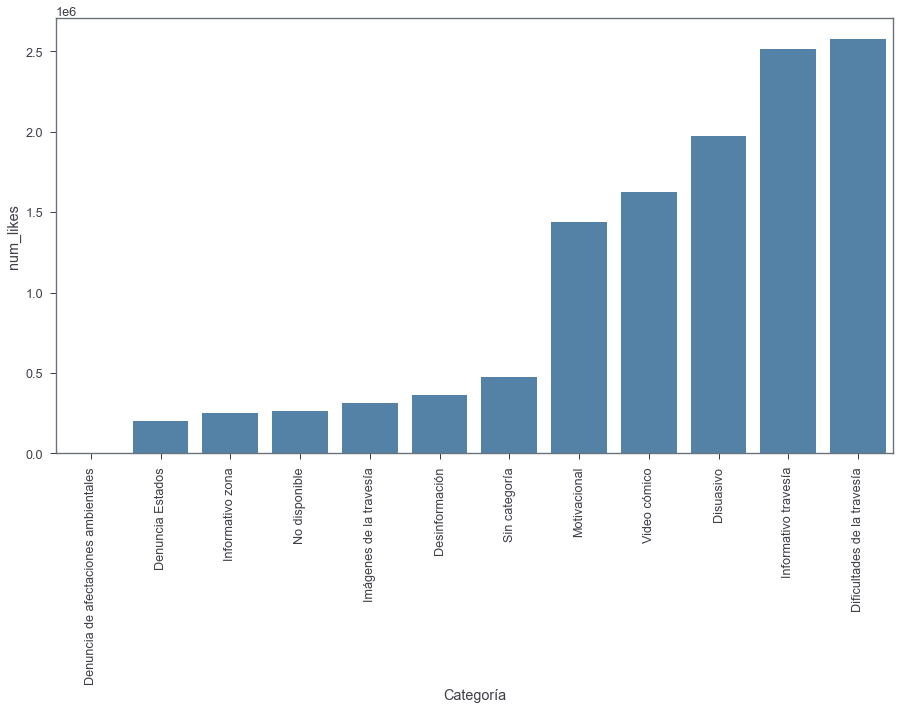

In [14]:
base_agrupada_fechas = archivo.groupby('Categoría').sum()
plt.figure(figsize=(15,8))
#base_tiktok.rename(inplace=True,  columns={"Menciones" : "Publicaciones"})
base_agrupada_fechas = base_agrupada_fechas[base_agrupada_fechas.index != 'No corresponde al tema']
base_agrupada_fechas.sort_values(['num_likes'], ascending = True, inplace = True)
ax = sns.barplot(x=base_agrupada_fechas.index,y=base_agrupada_fechas["num_likes"],data=base_agrupada_fechas,color='steelblue')
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()

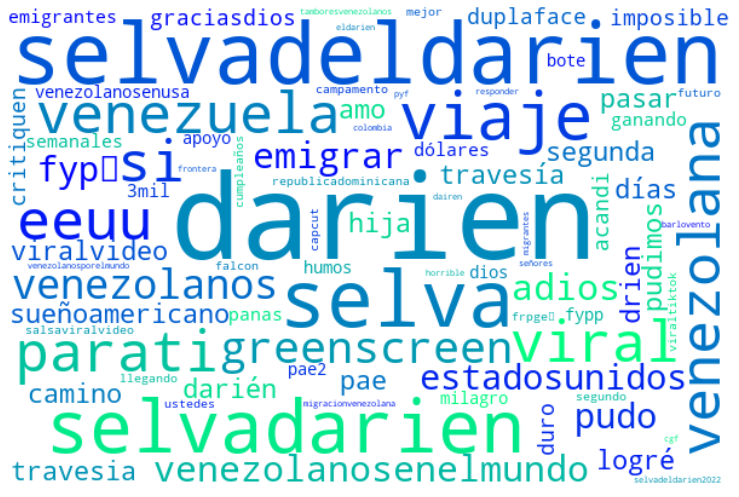

In [15]:
palabras = archivo[archivo['Categoría'] == 'Motivacional']['Clean_Text_no_stopwords'].to_list()
cloud=WordCloud(background_color='white',colormap="winter_r",width=600,height=400).generate(' '.join(palabras))
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

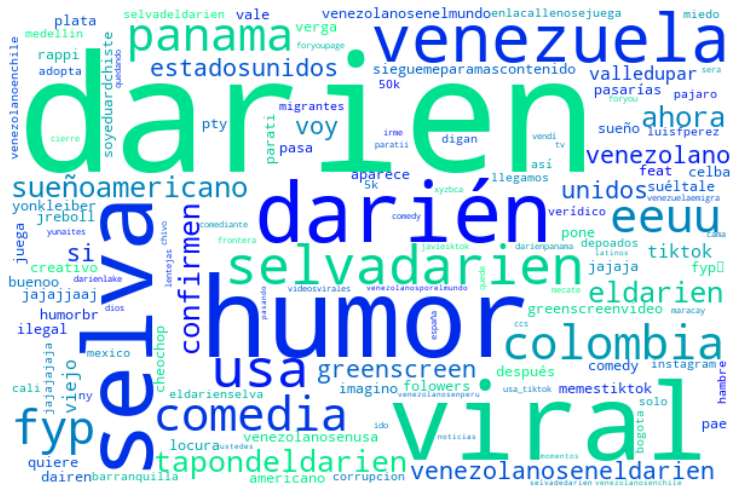

In [16]:
palabras = archivo[archivo['Categoría'] == 'Video cómico']['Clean_Text_no_stopwords'].to_list()
cloud=WordCloud(background_color='white',colormap="winter_r",width=600,height=400).generate(' '.join(palabras))
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

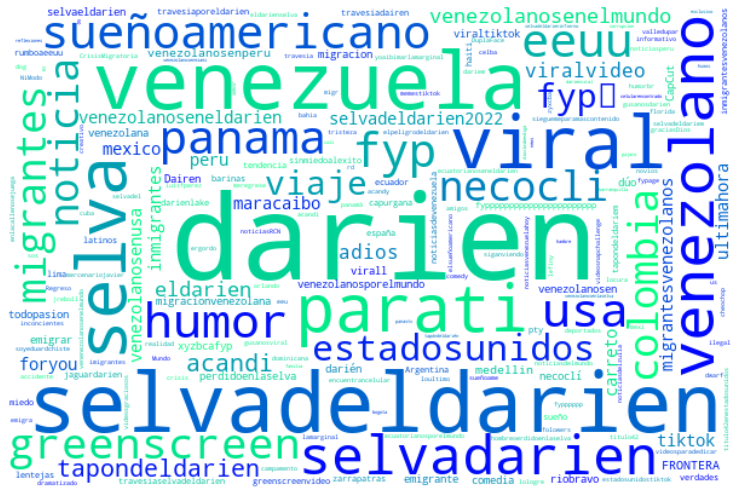

In [21]:
palabras = archivo[archivo['Categoría'] != 'No corresponde al tema']
hashtags = palabras.descripcion.str.findall(r'#.*?(?=\s|$)')
cadena = ''
for lista in hashtags:
    for i in lista:
        cadena = cadena + ' ' + i.strip()
cloud=WordCloud(background_color='white',colormap="winter_r",width=600,height=400).generate(cadena)
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

C:\Users\JOSE\anaconda3\envs\nltkenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127483 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JOSE\anaconda3\envs\nltkenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127466 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JOSE\anaconda3\envs\nltkenv\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127483 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\JOSE\anaconda3\envs\nltkenv\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127466 missing from current font.
  font.set_text(s, 0, flags=flags)


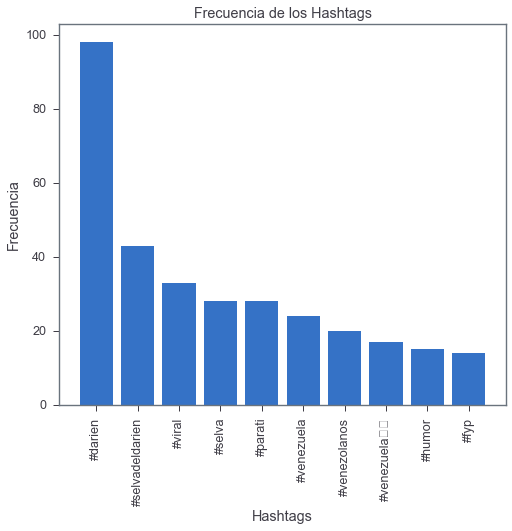

In [22]:
from collections import Counter
palabras_clave = list()
for lista in hashtags:
    for i in lista:
        palabras_clave.append(i)
count = Counter(palabras_clave)
data = count.most_common(10)
x_values = [x[0] for x in data]
y_values = [x[1] for x in data]

plt.bar(x_values, y_values)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability
plt.xlabel('Hashtags')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los Hashtags')
plt.show()